In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Этап 1. Работа с данными 

**Признаки (колонки, переменные, атрибуты) датасета:**


- **Pclass** - класс, в котором плыл пассажир, passenger class 


- **SibSp** - количество братьев-сестёр/супругов на борту, sibling/spouse


- **Parch** - количество детей/родителей пассажира на борту, parent/children


- **Cabin** - номер каюты 


In [2]:
train = pd.read_csv('train.csv', index_col = 'PassengerId')
test = pd.read_csv('test.csv', index_col = 'PassengerId')

In [3]:
train.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [4]:
test.head()

Pclass                                          Name     Sex  \
PassengerId                                                                 
892               3                              Kelly, Mr. James    male   
893               3              Wilkes, Mrs. James (Ellen Needs)  female   
894               2                     Myles, Mr. Thomas Francis    male   
895               3                              Wirz, Mr. Albert    male   
896               3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

              Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
PassengerId                                                       
892          34.5      0      0   330911   7.8292   NaN        Q  
893          47.0      1      0   363272   7.0000   NaN        S  
894          62.0      0      0   240276   9.6875   NaN        Q  
895          27.0      0      0   315154   8.6625   NaN        S  
896          22.0      1      1  3101298  12.2875   NaN        S

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [7]:
# удаление ненужных колонок 
useless_columns = ['Name', 'Ticket', 'Cabin']
train_clean = train.drop(columns=useless_columns)
test_clean = test.drop(columns=useless_columns)

### Заполнение пропусков в данных

In [8]:
def impute_data(df):
    
    df_copy = df.copy() # Делаем копию
    
    # Заполняем пропущенные значения для категориальных переменных модой
    categorial_vars = list(df_copy.select_dtypes(include=['object']).columns.values) # вывести список колонок типа object
    for col in categorial_vars:
        
        if (df_copy[col].isnull().values.any()):
            df_copy[col].fillna(df_copy[col].mode()[0], inplace = True)
            
            
            
    # Заполняем пропущенные значения для количественных переменных медианой
    numerical_vars = list(df_copy.select_dtypes(include=['int64', 'float64']).columns.values)
    for col in numerical_vars:
        if (df_copy[col].isnull().values.any()):
            df_copy[col].fillna(df_copy[col].median(), inplace = True)
    
    return df_copy

In [9]:
train_full = impute_data(train_clean)
test_full = impute_data(test_clean)

In [10]:
# Посмотрим изменения
train_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [11]:
test_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


### Визуализация данных

/Users/denis/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


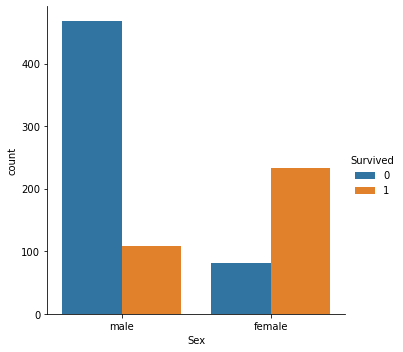

In [12]:
# мужчиные умирают чаще
sns.catplot('Sex', data=train_full, hue = 'Survived', kind = 'count')

/Users/denis/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


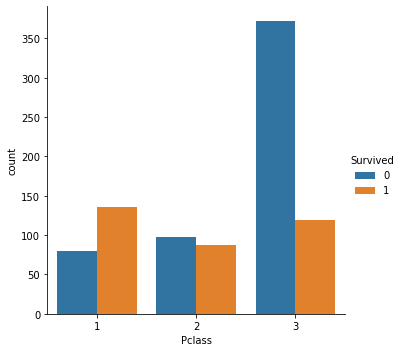

In [13]:
# бедные умирают чаще

sns.catplot('Pclass', data=train_full, hue = 'Survived', kind = 'count')

/Users/denis/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


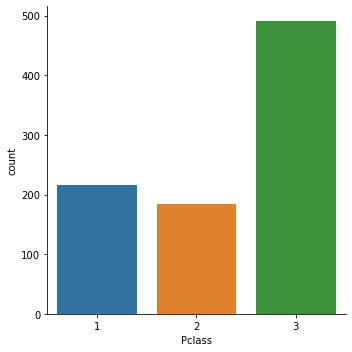

In [14]:
# При этом, бедных было больше всего 

sns.catplot('Pclass', data=train_full, kind = 'count')

/Users/denis/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


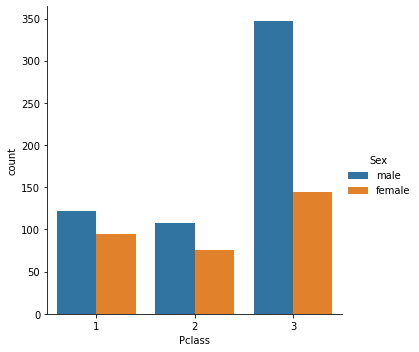

In [15]:
# Бедных мужчин было больше всего 

sns.catplot('Pclass', data=train_full, hue = 'Sex', kind = 'count')

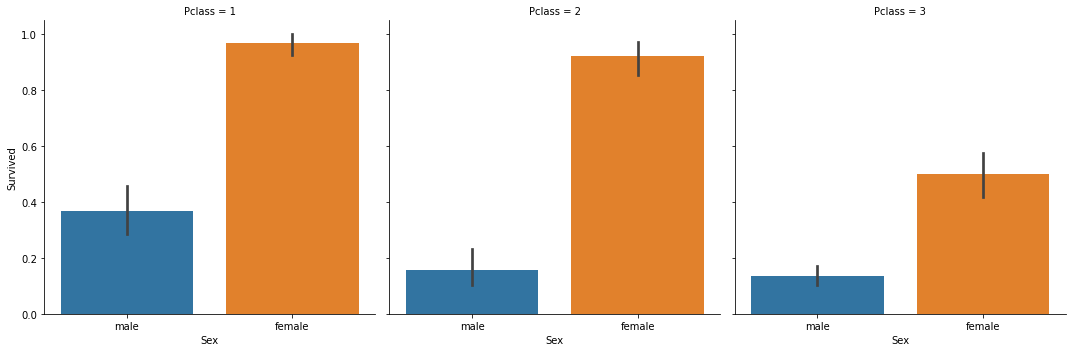

In [16]:
# Выживших среди них было меньше всего 

sns.catplot(x = 'Sex', y = 'Survived', col = 'Pclass', data = train_full, kind = "bar")

/Users/denis/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


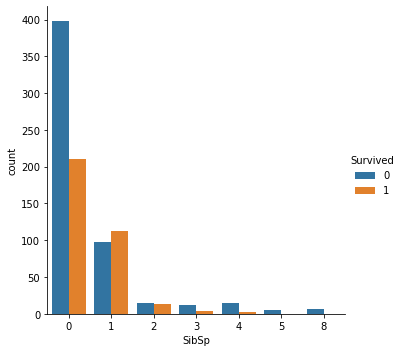

In [17]:
# От количества членов семьи зависит выживаемость
# Признак - SibSp (кол-во супругов, родственников пассажира)

sns.catplot('SibSp', data = train_full, hue = 'Survived', kind = "count")

/Users/denis/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


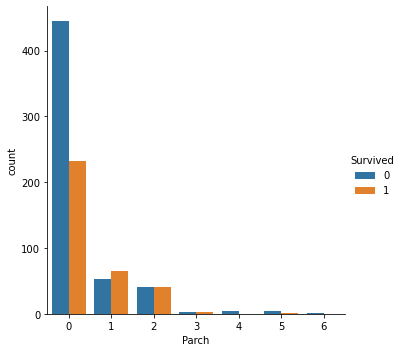

In [18]:
# От количества членов семьи зависит выживаемость
# Признак - Parch (кол-во детей, родителей пассажиров)

sns.catplot('Parch', data = train_full, hue = 'Survived', kind = "count")

### Объединими признаки количество членов семьи в один

In [19]:
train_full['Family_size'] = train_full['Parch'] + train_full['SibSp']
test_full['Family_size'] = test_full['Parch'] + test_full['SibSp']
train_full.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
PassengerId                                                                   
1                   0       3    male  22.0      1      0   7.2500        S   
2                   1       1  female  38.0      1      0  71.2833        C   
3                   1       3  female  26.0      0      0   7.9250        S   
4                   1       1  female  35.0      1      0  53.1000        S   
5                   0       3    male  35.0      0      0   8.0500        S   

             Family_size  
PassengerId               
1                      1  
2                      1  
3                      0  
4                      1  
5                      0

/Users/denis/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


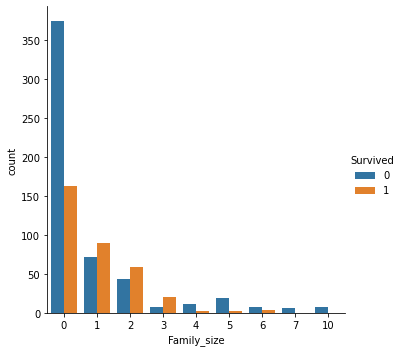

In [20]:
sns.catplot('Family_size', data = train_full, hue = 'Survived', kind = "count")

 ### Сохранение данных 

In [21]:
train_full.to_csv('train_imputed.csv')
test_full.to_csv('test_imputed.csv')

### baseline-модель (решающий пень, decision stump)

In [22]:
# Получаем булевый вектор, содержаший условие

(test_full['Sex'] == 'male')

PassengerId
892      True
893     False
894      True
895      True
896     False
        ...  
1305     True
1306    False
1307     True
1308     True
1309     True
Name: Sex, Length: 418, dtype: bool

In [23]:
(test_full['Sex'] == 'male') & (test_full['Pclass'] == 3) 

PassengerId
892      True
893     False
894     False
895      True
896     False
        ...  
1305     True
1306    False
1307     True
1308     True
1309     True
Length: 418, dtype: bool

In [24]:
# Берем всех мужчин, которые были в 3м классе и говорим, что они не выжили

simple_pred = (~((test_full['Sex'] == 'male') & (test_full['Pclass'] == 3))).astype(int).values

### Оформляем результат

In [25]:
def make_prediction_file(prediction, test_data, name):
    result = pd.DataFrame({'PassengerId': test_data.reset_index()['PassengerId'], "Survived":prediction})
    result.to_csv(name, index = False)

In [26]:
make_prediction_file(simple_pred, test, 'titanic_simple_baseline.csv')

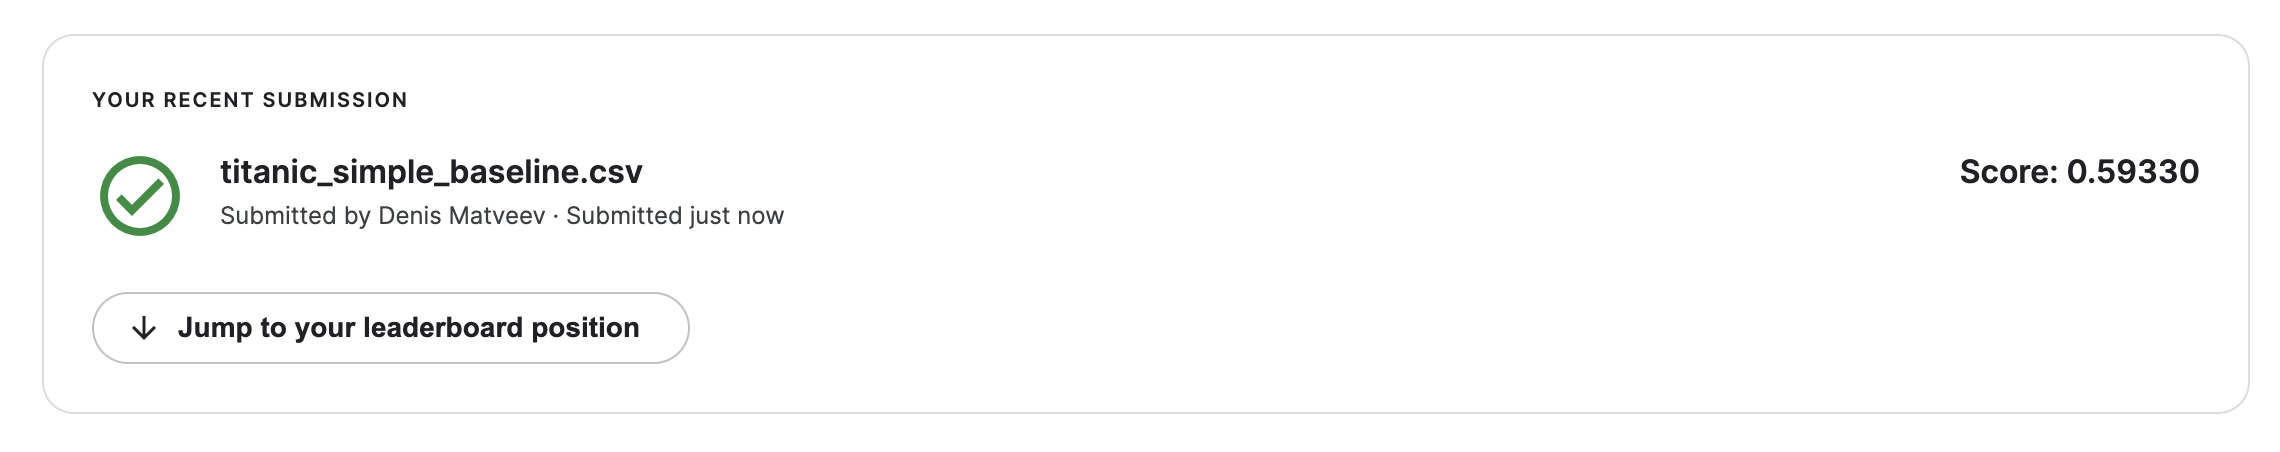

### Второй способ, Решающее дерево

In [27]:
# Отделяем колонку с ответом от тестовой выборки

y_train = train_full['Survived']
train_sep = train_full.drop(columns=['Survived'])

In [28]:
#One-hot-encoding категориальных переменных

def encode_categorical(df_train, df_test):
    
    test_start_ind = df_train.index[-1] #запомнили индекс, с которого начинаются тестовые данные
    
    concated_df = pd.concat([df_train, df_test], sort=False) #объединили обучающую выборку с тестовой, для корректности
                                                             #преобразования
        
    encoded_df = pd.get_dummies(concated_df, drop_first=True)#преобразовали
    
    
    df_train_encoded, df_test_encoded = encoded_df.iloc[:test_start_ind, :], encoded_df.iloc[test_start_ind:, :] #разъединили
    
    return df_train_encoded, df_test_encoded

In [29]:
X_train, X_test = encode_categorical(train_sep, test_full)

In [30]:
X_test.head()

Pclass   Age  SibSp  Parch     Fare  Family_size  Sex_male  \
PassengerId                                                               
892               3  34.5      0      0   7.8292            0         1   
893               3  47.0      1      0   7.0000            1         0   
894               2  62.0      0      0   9.6875            0         1   
895               3  27.0      0      0   8.6625            0         1   
896               3  22.0      1      1  12.2875            2         0   

             Embarked_Q  Embarked_S  
PassengerId                          
892                   1           0  
893                   0           1  
894                   1           0  
895                   0           1  
896                   0           1

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Age          891 non-null    float64
 2   SibSp        891 non-null    int64  
 3   Parch        891 non-null    int64  
 4   Fare         891 non-null    float64
 5   Family_size  891 non-null    int64  
 6   Sex_male     891 non-null    uint8  
 7   Embarked_Q   891 non-null    uint8  
 8   Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.3 KB


In [32]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Age          418 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   Fare         418 non-null    float64
 5   Family_size  418 non-null    int64  
 6   Sex_male     418 non-null    uint8  
 7   Embarked_Q   418 non-null    uint8  
 8   Embarked_S   418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 24.1 KB


### Проводим обучение

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
# Создание экземпляра класса
dt_clf = DecisionTreeClassifier()

In [35]:
%%time

dt_clf.fit(X_train, y_train) #обучение

CPU times: user 4.68 ms, sys: 1.34 ms, total: 6.01 ms
Wall time: 6.76 ms


DecisionTreeClassifier()

In [36]:
pred_dt_simple = dt_clf.predict(X_test) #предсказание результата

### Визуализация

In [37]:
#conda install -c anaconda graphviz в anaconda prompt (если локально)

from sklearn.tree import export_graphviz
from IPython.display import Image, display


def visualize_tree(clf, X, file_name):
    
    export_graphviz(clf, feature_names=X.columns, out_file=file_name + '.dot', filled=True)
    
    #при помощи восклицательного знака можно вызвать терминал
    !dot -Tpng {file_name}.dot -o {file_name}.png
    
    display(Image(filename=file_name + '.png'))

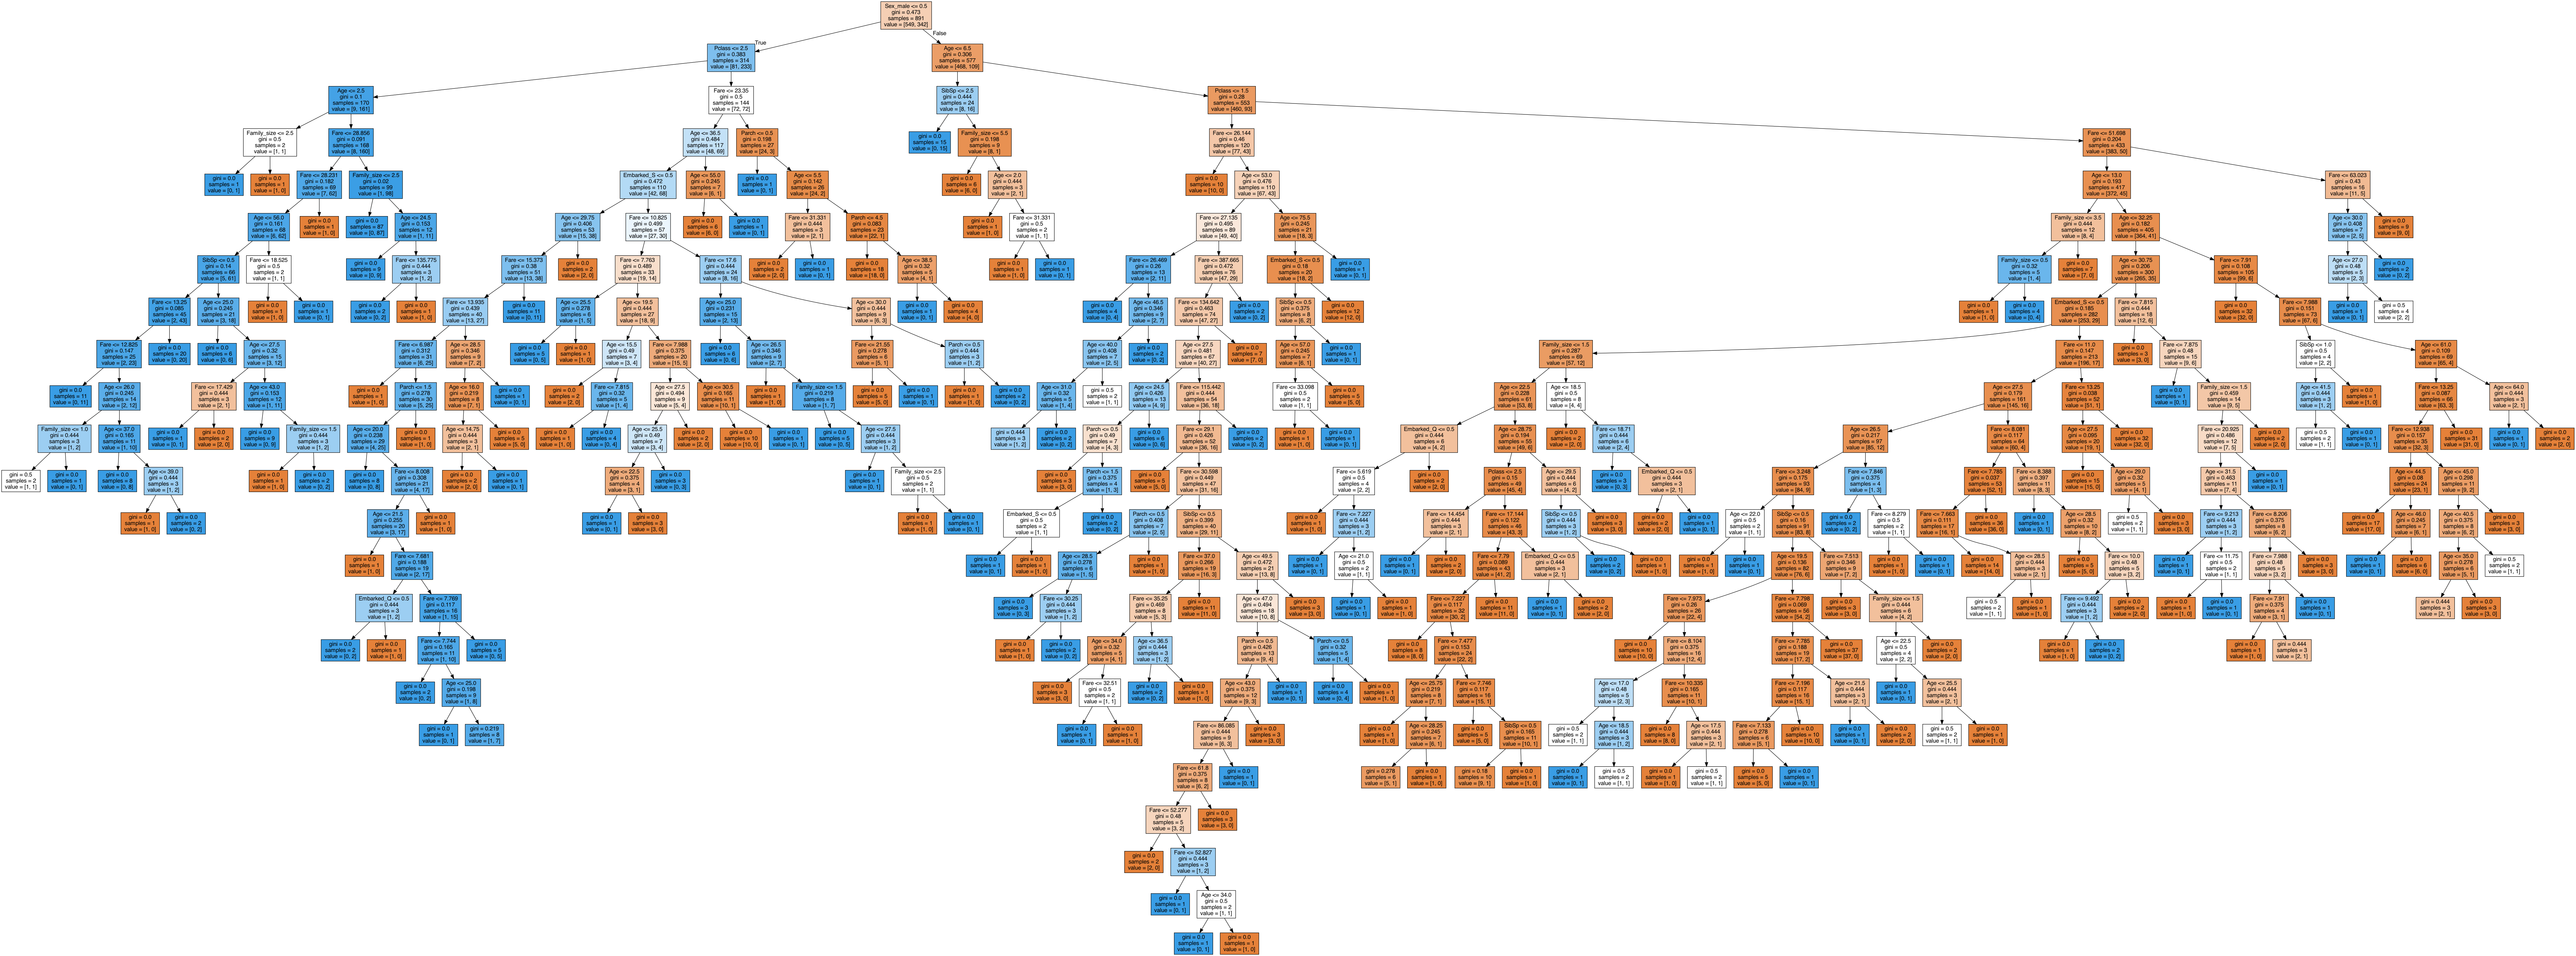

In [39]:
visualize_tree(dt_clf, X_train, 'tree');

### Подбор гиперпараметров с помощью GridSearchCV
#####  перебор параметров и выбор наилучшего

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
clf = DecisionTreeClassifier()

parameters = {
              'criterion': ['entropy', 'gini'],
              'max_depth': range(1, 10),
              'min_samples_split': range(2, 10),
              'min_samples_leaf': range(1, 10)
             }


grid_cv = GridSearchCV(clf, parameters, cv=5)

In [42]:
%%time

grid_cv.fit(X_train, y_train)

CPU times: user 24.6 s, sys: 456 ms, total: 25.1 s
Wall time: 26.6 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)})

In [43]:
#выбираем лучшую модель из обученных

best_model = grid_cv.best_estimator_

In [44]:
print('Лучшие параметры классификатора:', grid_cv.best_params_)

Лучшие параметры классификатора: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 2}


In [45]:
#делаем предсказание

grid_pred = best_model.predict(X_test)

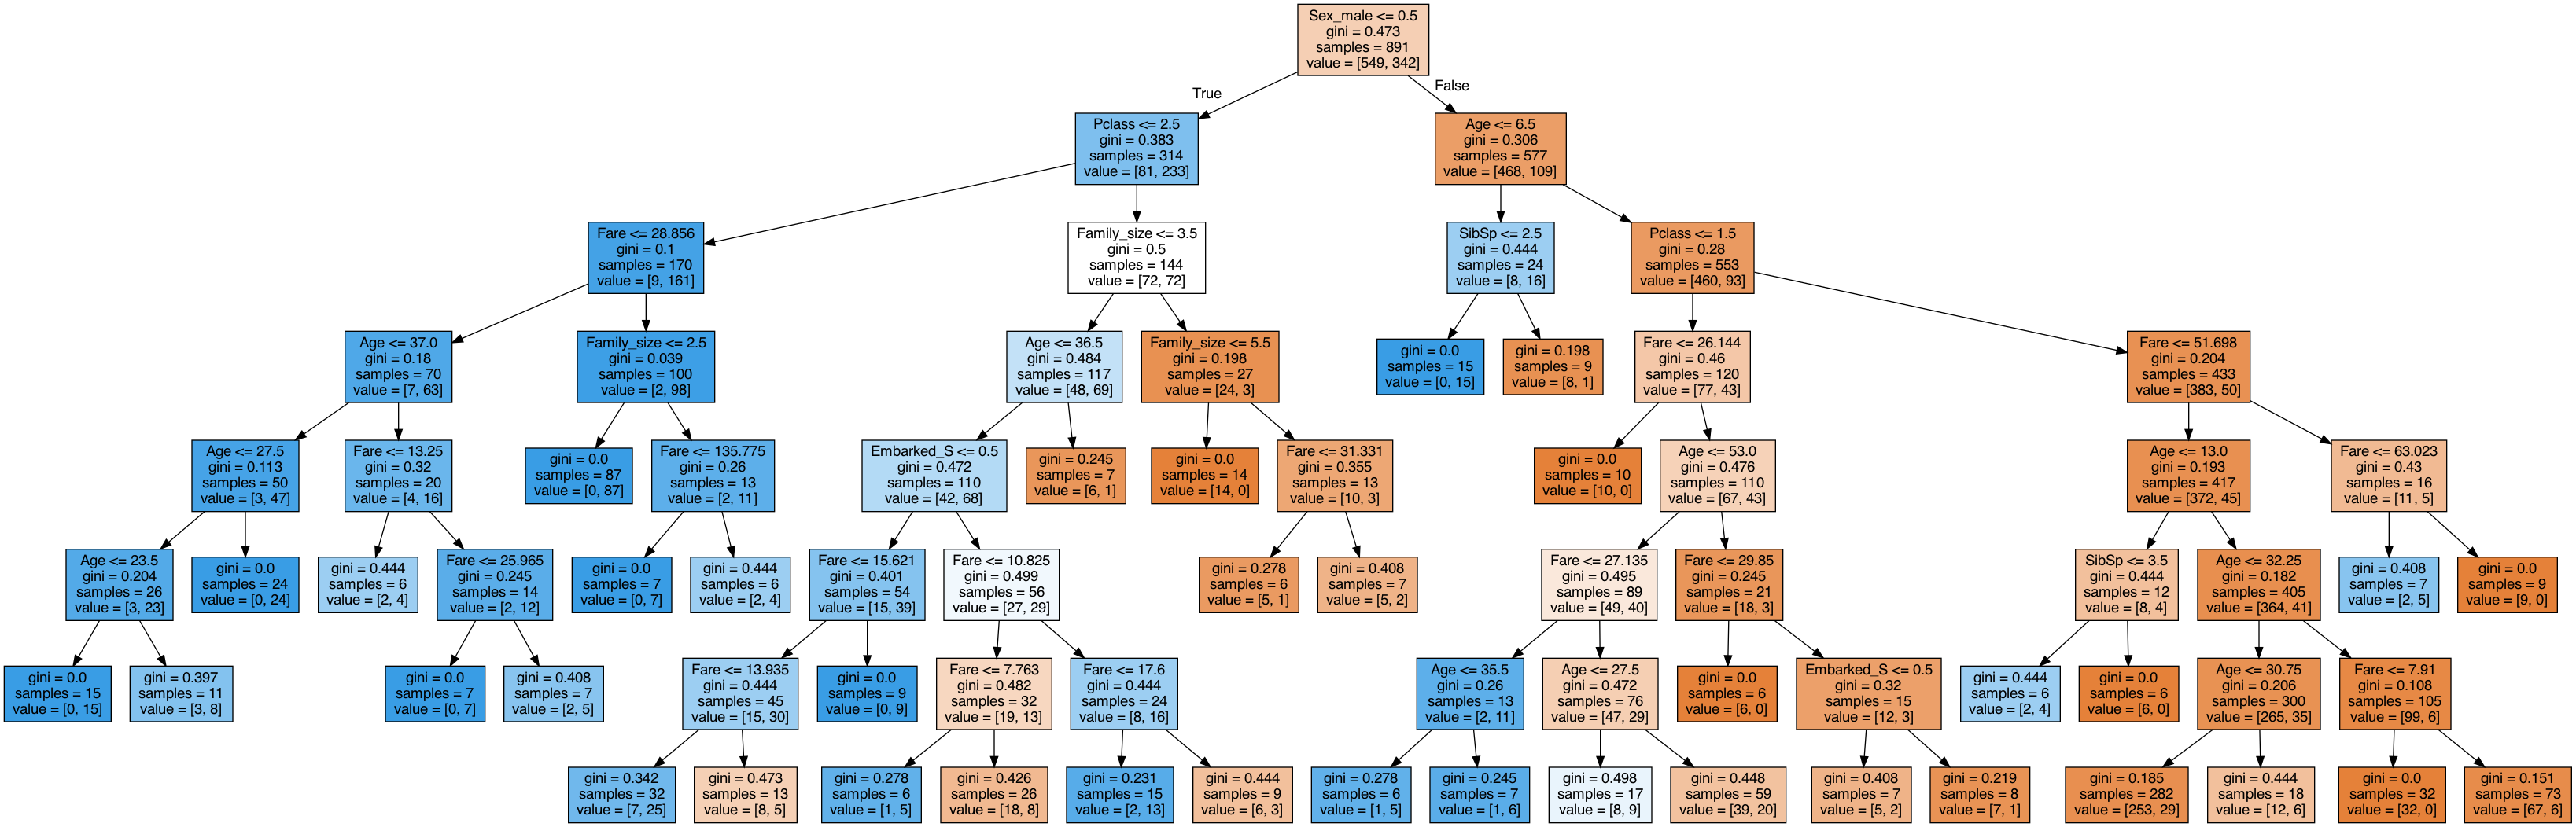

In [46]:
visualize_tree(best_model, X_train, 'tree_gridsearch')

### Более быстрый подбор гиперпараметров, но рандомный 

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
random_grid_cv = RandomizedSearchCV(clf, parameters, cv=5) # выбираем 5 случайных значений параметров

In [51]:
%%time

random_grid_cv.fit(X_train, y_train);

CPU times: user 272 ms, sys: 8.87 ms, total: 281 ms
Wall time: 309 ms


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(1, 10),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10)})

In [52]:
#выбираем лучшую модель из обученных

best_model_rand = random_grid_cv.best_estimator_

In [53]:
print('Лучшие параметры классификатора:', random_grid_cv.best_params_)

Лучшие параметры классификатора: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 7, 'criterion': 'gini'}


In [54]:
#делаем предсказание

rand_grid_pred = best_model_rand.predict(X_test)

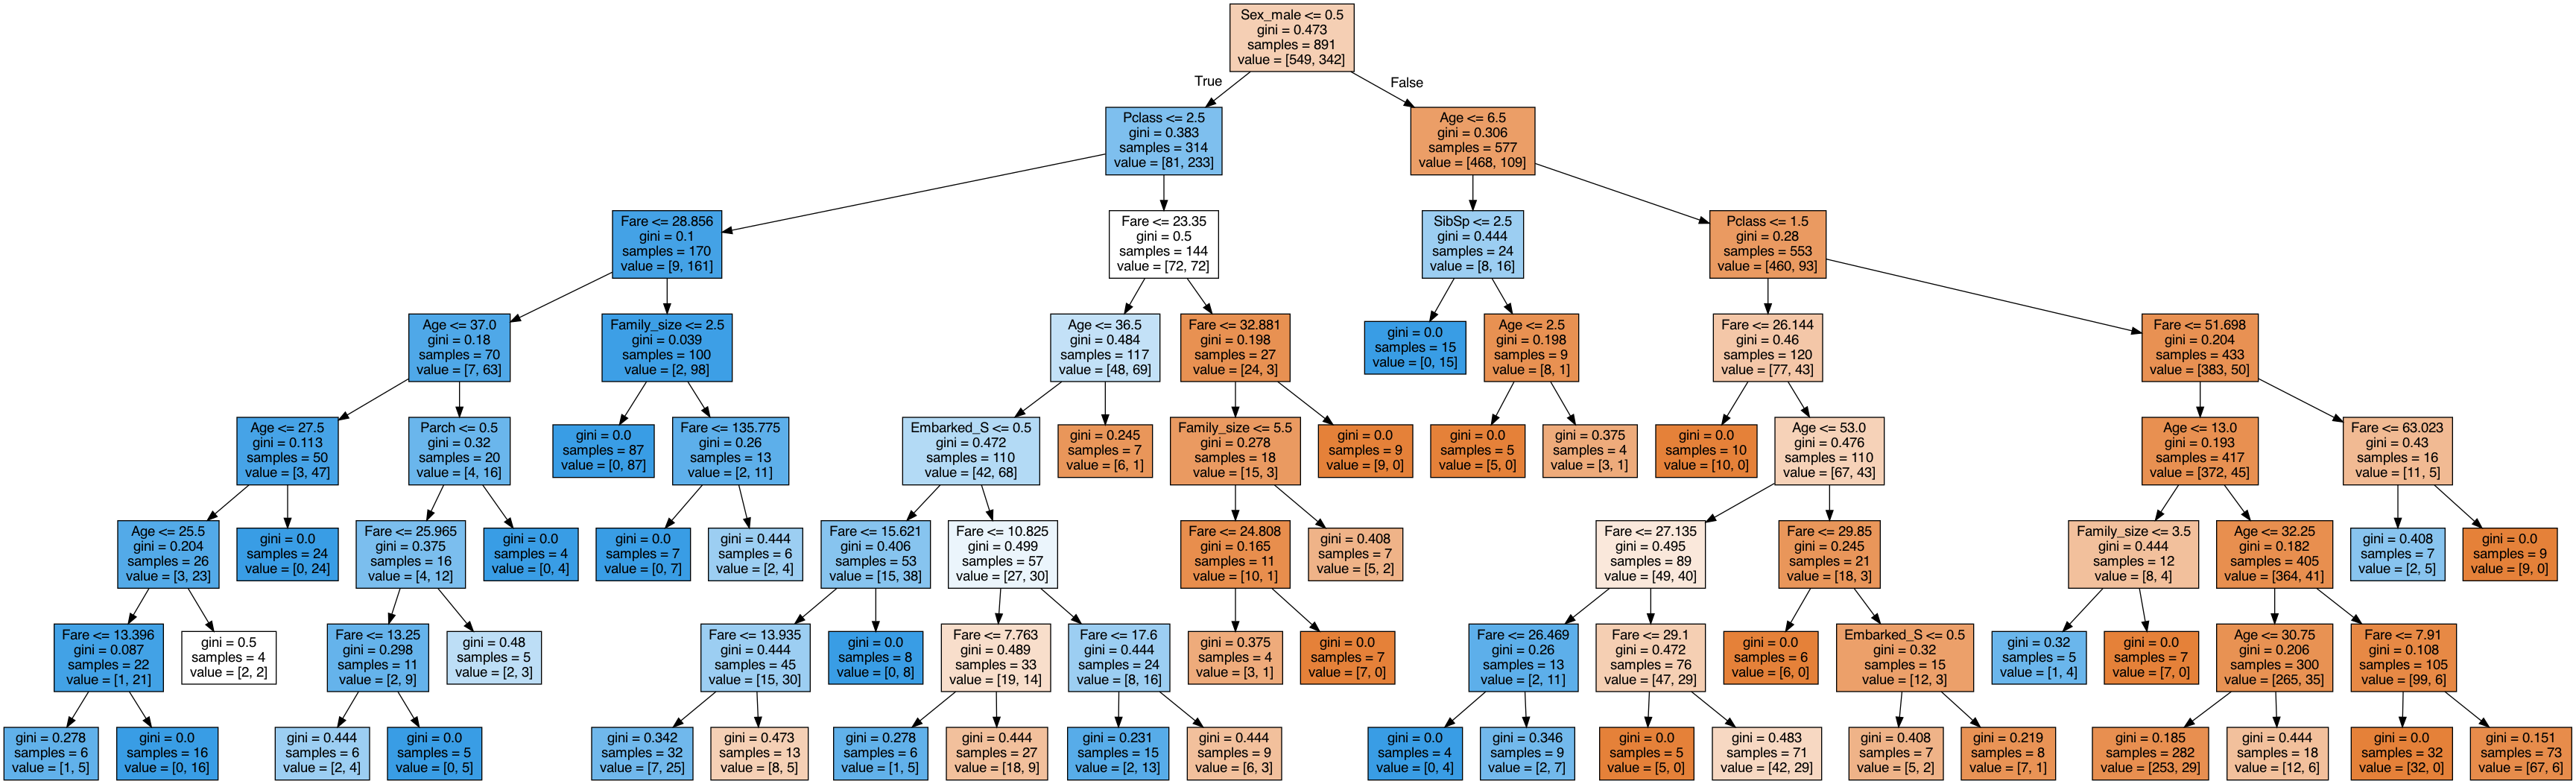

In [55]:
visualize_tree(best_model_rand, X_train, 'tree_rand')

### Результаты

In [56]:
#функция для составления submission-файла соревнования

def make_prediction_file(prediction, test_data, name):
    
    result = pd.DataFrame({'PassengerId': test_data.reset_index()['PassengerId'], "Survived": prediction})  
    result.to_csv(name, index=False)

#### 1) Простое решающее дерево

In [57]:
make_prediction_file(pred_dt_simple, test, 'titanic_dt_simple.csv')

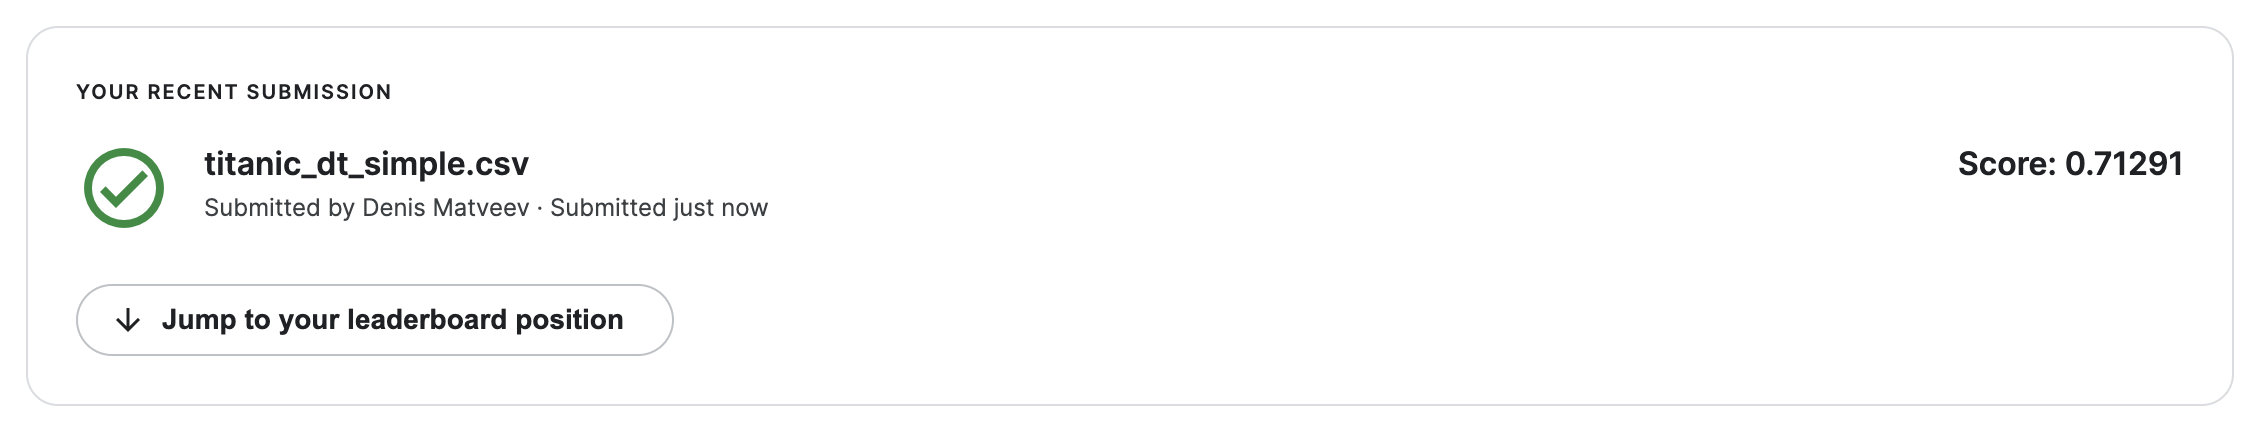

#### 2) Дерево, построенное с помощью GridSearchCV (лучший результат)

In [58]:
make_prediction_file(grid_pred, test, 'titanic_dt_gridcv.csv')

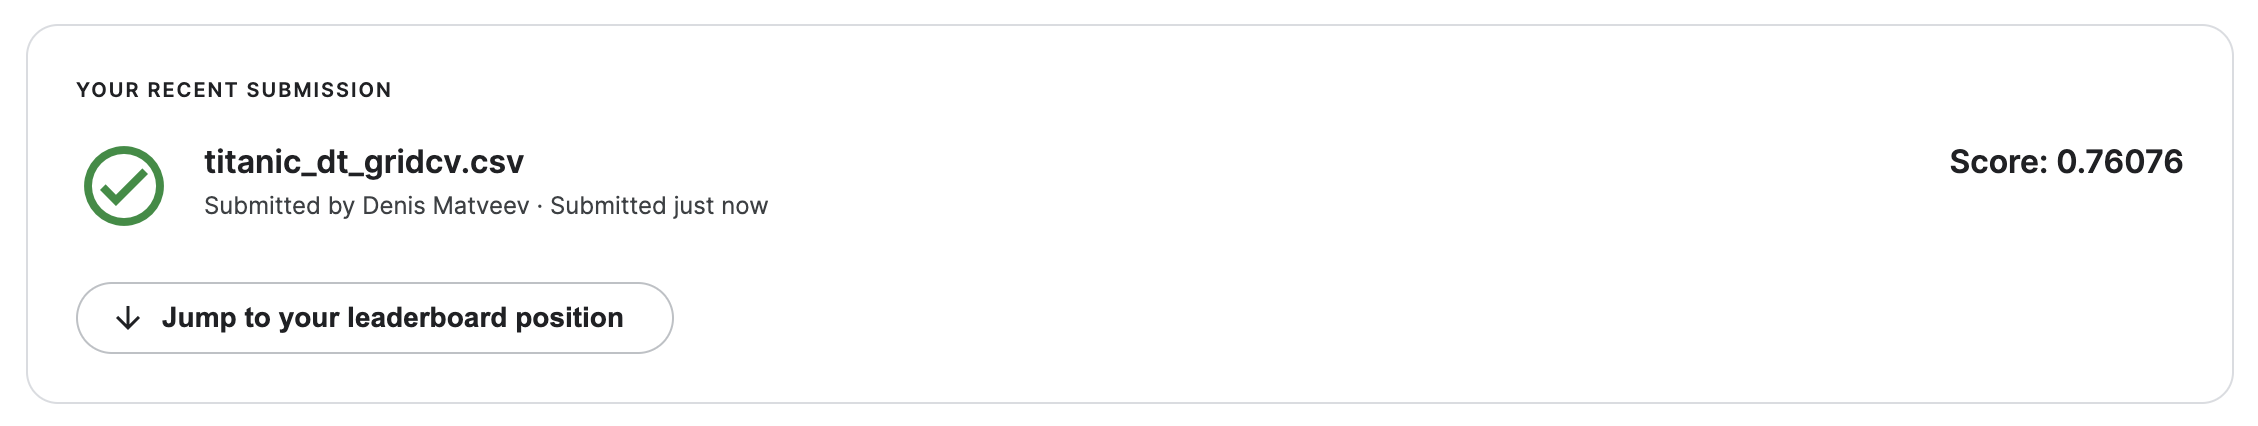

#### 3)  Дерево, построенное с помощью RandomizedSearchCV (лучше обычного, хуже лучшего)

In [59]:
make_prediction_file(rand_grid_pred, test, 'titanic_dt_rand_search.csv')

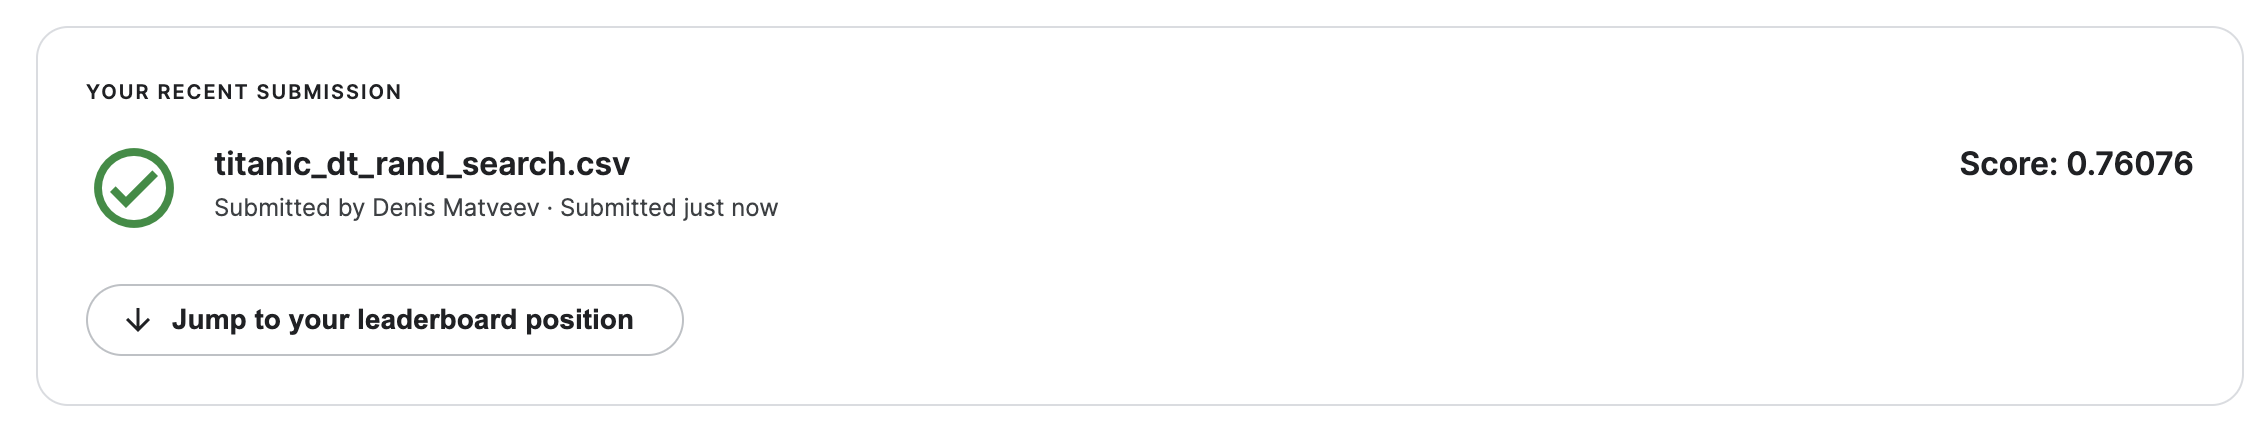

### Переобучение модели, ограничили глубину дерева

In [60]:
dt_best = DecisionTreeClassifier(max_depth=4)

dt_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

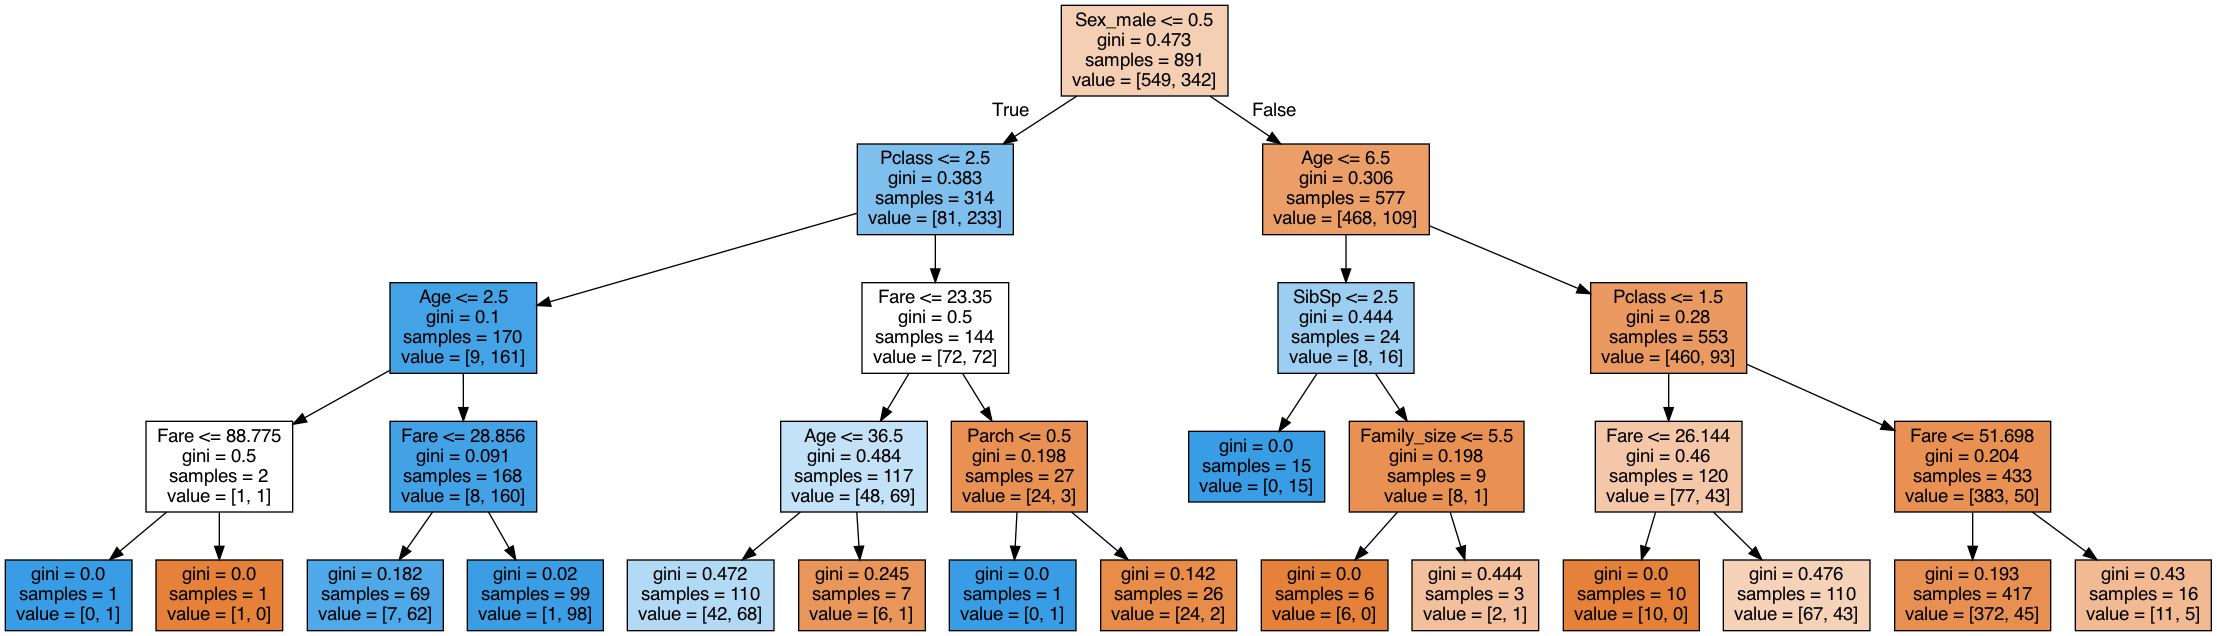

In [61]:
visualize_tree(dt_best, X_train, 'tree_best')

In [62]:
pred_tree_best = dt_best.predict(X_test)

make_prediction_file(pred_tree_best, test, 'titanic_dt_best.csv')

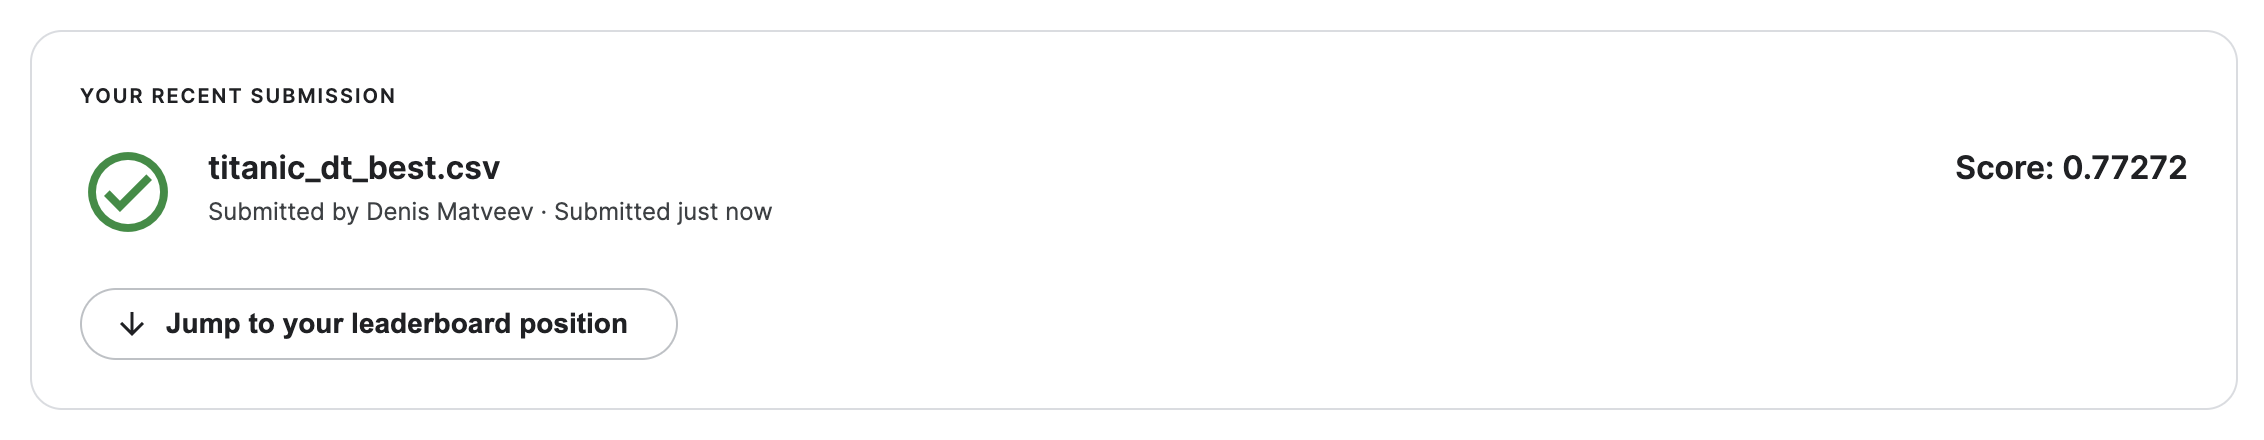